In [1]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\keena\Documents\University\python_scripts")

#from Function_files.addresses import Init_Directories

import Function_files.data_functions as dat
from Function_files.math_functions import corrected_pulse_area
from Function_files.plotting_functions import plot_scope
from numpy import abs, divide
from TPA import TPA_config_new as config_file
import os

dir = r"C:\Users\keena\Downloads\0720_TPA\Calibration"

In [2]:
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interrogate(path=dir, extensions=['.csv'], exceptions=['avg', '.png'])
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# assemble reference paths
# extract excel data from the folders
data_path_list = dat.search_paths(folder_list, file_list, '.csv')
excel_sets = [[dat.open_csv(os.path.join(dir, data_path)) for data_path in data_paths] for data_paths in data_path_list]
di = dict(time = 0,
          sp_trans = 4,
          sp_ref = 3,
          cp_trans = 2,
          cp_ref = 1)
labels = {key:di[key] for key in di.keys() if key != 'time'}

solo_1550


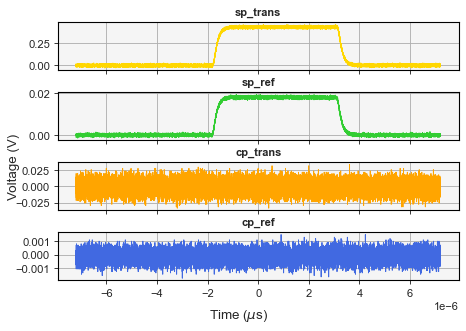

In [3]:
# plot 1550 reference data to check assignment
x = 'solo_1550'
fol = fol_i[x]
a = 0
fig, ax = plot_scope(excel_sets[fol][a][di['time']], [excel_sets[fol][a][di['sp_trans']], excel_sets[fol][a][di['sp_ref']], excel_sets[fol][a][di['cp_trans']], excel_sets[fol][a][di['cp_ref']]], titles=labels, multi=True)
print(x)

In [11]:
# time step of scope timebase
dt = (excel_sets[0][0][di['time']][1] - excel_sets[0][0][di['time']][0])*1E6
area_indexes = [[di['cp_trans'], di['cp_ref'], di['time'], 0, round(4/dt)], [di['sp_trans'], di['sp_ref'], di['time'], 0, round(4/dt)]]
ratios = []
for index, fol in enumerate(fol_i):
    fast = []
    slow = []
    for file in fil_i[index]:
        if 'slow' in file:
        # calculate the normalised reference areas
            slow.append(corrected_pulse_area(excel_sets[fol_i[fol]][fil_i[index][file]], area_indexes[index]))
        elif 'fast' in file:
            fast.append(corrected_pulse_area(excel_sets[fol_i[fol]][fil_i[index][file]], area_indexes[index]))
    ratios.append([fast, slow])

In [12]:
ratios

[[[27.50286504890994, 18.977964747697037, 19.036769564055632],
  [23.875024139696873, 16.673279411448334, 16.581409028144968]],
 [[24.285045430590387, 24.6973793500106, 25.78694636372072],
  [65.40201396093417, 66.4061137111094, 66.59549638962574]]]

In [13]:
average = []
for set in ratios:
    avg = 0
    for value in set:
        avg += value
    average.append(avg/len(set))

TypeError: unsupported operand type(s) for +=: 'int' and 'list'

In [7]:
average

[20.4412186566588, 45.52883253433183]

In [ ]:
perc_av = []
for av, set in zip(average, ratios):
    perc = []
    for value in set:
        perc.append(abs(100-(100*(value/av))))
    perc_av.append(perc)


In [ ]:
av_change = []
for set in perc_av:
    temp = 0
    for value in set:
        temp += value
    av_change.append(temp/len(set))

perc_av

In [ ]:
av_change